# Transforms Demo

This notebook demonstrates two ways to use your C++ build from a notebook:

1. Run the compiled `build\Debug\transforms.exe` from Python and capture its stdout.
2. Reproduce the same image transforms using OpenCV in Python and display the results inline.

returncode = 0
stdout:
 Loaded image from: ..\dataset\leftImg8bit_trainvaltest\test\berlin\berlin_000000_000019_leftImg8bit.png
[ INFO:0@0.477] global registry_parallel.impl.hpp:96 cv::parallel::ParallelBackendRegistry::ParallelBackendRegistry core(parallel): Enabled backends(3, sorted by priority): ONETBB(1000); TBB(990); OPENMP(980)
[ INFO:0@0.477] global plugin_loader.impl.hpp:67 cv::plugin::impl::DynamicLib::libraryLoad load C:\opencv\build\x64\vc16\bin\opencv_core_parallel_onetbb4120_64d.dll => FAILED
[ INFO:0@0.481] global plugin_loader.impl.hpp:67 cv::plugin::impl::DynamicLib::libraryLoad load opencv_core_parallel_onetbb4120_64d.dll => FAILED
[ INFO:0@0.481] global plugin_loader.impl.hpp:67 cv::plugin::impl::DynamicLib::libraryLoad load C:\opencv\build\x64\vc16\bin\opencv_core_parallel_tbb4120_64d.dll => FAILED
[ INFO:0@0.484] global plugin_loader.impl.hpp:67 cv::plugin::impl::DynamicLib::libraryLoad load opencv_core_parallel_tbb4120_64d.dll => FAILED
[ INFO:0@0.484] global plug

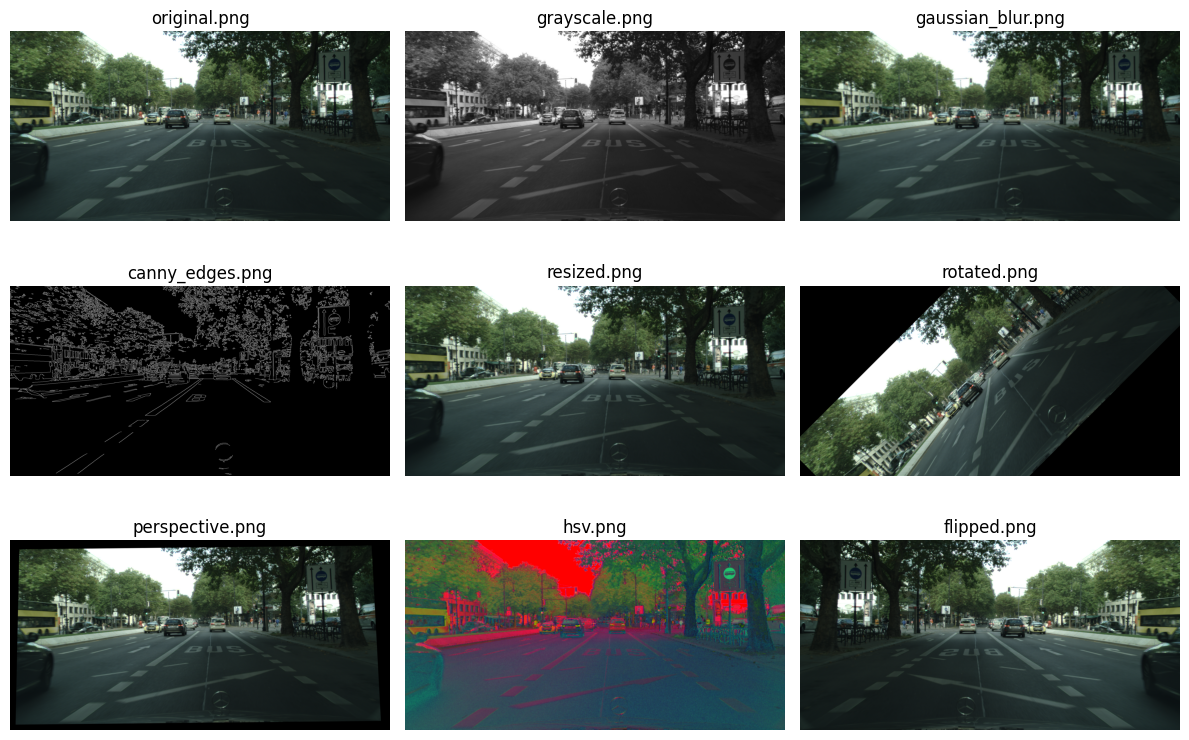

In [12]:
# Run the compiled executable headlessly (--no-gui) and capture stdout
import subprocess, sys, shutil, os
exe_path = os.path.join('..', 'build', 'Debug', 'transforms.exe')
if os.path.exists(exe_path):
    proc = subprocess.run([exe_path, '--no-gui'], capture_output=True, text=True)
    print('returncode =', proc.returncode)
    print('stdout:\n', proc.stdout)
    print('stderr:\n', proc.stderr)
    # If successful, load images from out_images/ and display a small preview
    if proc.returncode == 0:
        from PIL import Image, ImageOps
        import matplotlib.pyplot as plt
        out_dir = 'out_images'
        imgs = ['original.png','grayscale.png','gaussian_blur.png','canny_edges.png','resized.png','rotated.png','perspective.png','hsv.png','flipped.png']
        plt.figure(figsize=(12,8))
        for i, name in enumerate(imgs, 1):
            path = os.path.join(out_dir, name)
            if os.path.exists(path):
                im = Image.open(path).convert('RGB')
                plt.subplot(3,3,i)
                plt.imshow(im)
                plt.title(name)
                plt.axis('off')
        plt.tight_layout()
        plt.show()
else:
    print('Executable not found at', exe_path)

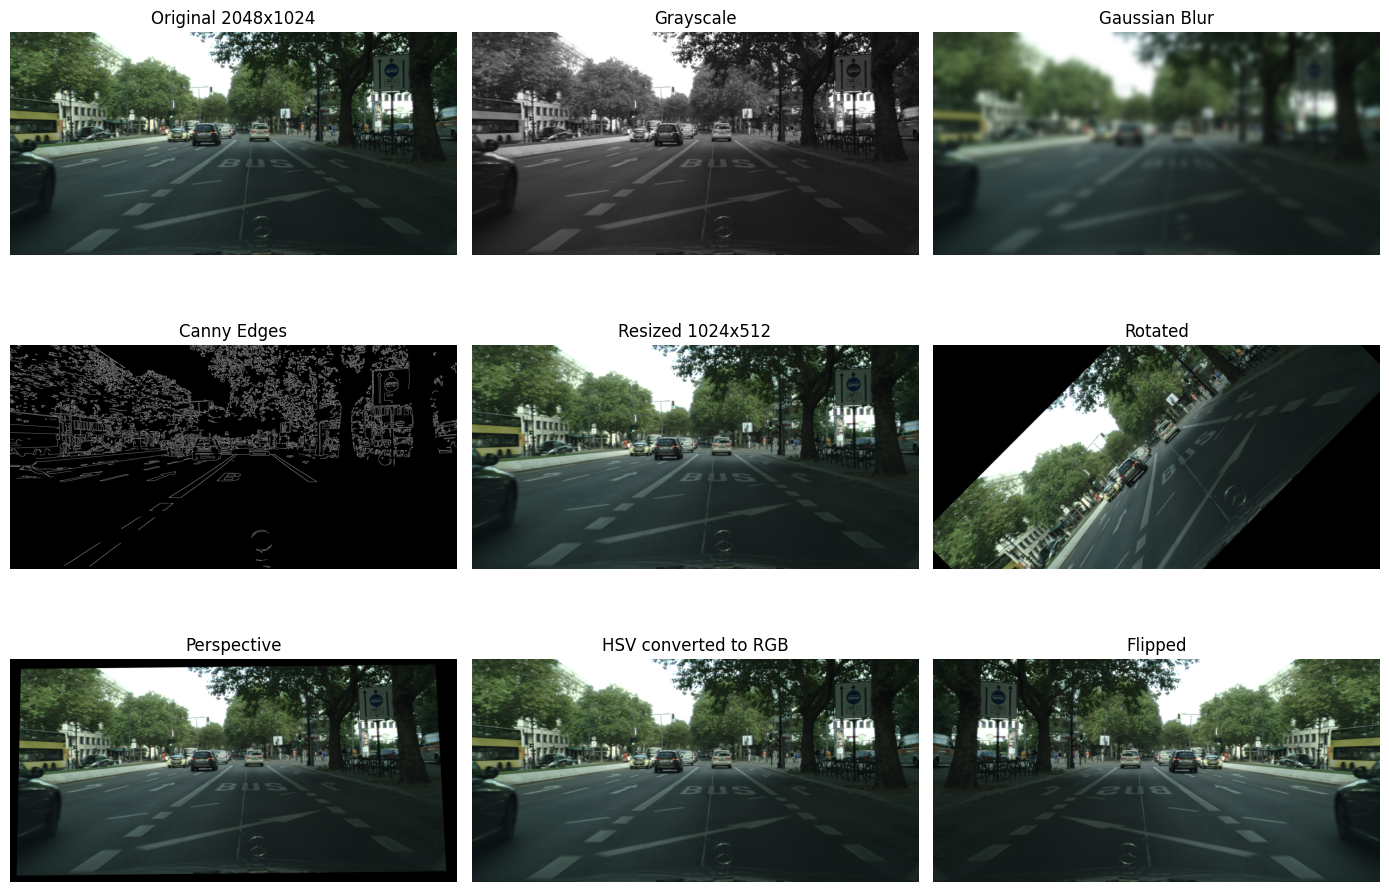

In [24]:
# Python/OpenCV reproduction of transforms (inline display)
import cv2
from matplotlib import pyplot as plt
import numpy as np

img_path = '../dataset/leftImg8bit_trainvaltest/test/berlin/berlin_000000_000019_leftImg8bit.png'
img = cv2.imread(img_path)
if img is None:
    print('Image not found:', img_path)
else:
    # Convert BGR to RGB for matplotlib
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(img, (71,71), 0)
    edges = cv2.Canny(gray, 50, 150)
    resized = cv2.resize(img, (img.shape[1]//2, img.shape[0]//2))
    # Rotation
    center = (img.shape[1]//2, img.shape[0]//2)
    M = cv2.getRotationMatrix2D(center, 45, 1.0)
    rotated = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
    # Perspective
    h, w = img.shape[:2]
    src = np.float32([[0,0], [w-1,0], [w-1,h-1], [0,h-1]])
    dst = np.float32([[50,50], [w-100,30], [w-50,h-50], [30,h-30]])
    P = cv2.getPerspectiveTransform(src, dst)
    persp = cv2.warpPerspective(img, P, (w, h))
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    flipped = cv2.flip(img, 1)

    ims = [rgb, cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB), cv2.cvtColor(blur, cv2.COLOR_BGR2RGB), cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB), cv2.cvtColor(resized, cv2.COLOR_BGR2RGB), cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB), cv2.cvtColor(persp, cv2.COLOR_BGR2RGB), cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB), cv2.cvtColor(flipped, cv2.COLOR_BGR2RGB)]
    titles = [f"Original {img.shape[1]}x{img.shape[0]}", 'Grayscale', 'Gaussian Blur', 'Canny Edges', f"Resized {resized.shape[1]}x{resized.shape[0]}", 'Rotated', 'Perspective', 'HSV converted to RGB', 'Flipped']
    plt.figure(figsize=(14,10))
    for i, (im, t) in enumerate(zip(ims, titles), 1):
        plt.subplot(3,3,i)
        plt.imshow(im)
        plt.title(t)
        plt.axis('off')
    plt.tight_layout()
    plt.show()